In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_data.load_data()

In [3]:
# Set the label names
labels = ['T-shirt', 'Trousers', 'Pullover', 'Dress',
          'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Before normalisation define the structure of the data
# ndarray where the first dimension is the number of images
# and the next are the shape of the images
# Each image is 28 x 28 x 1 
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Scale the images (as they are 8 bit)
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
cnn_model = tf.keras.Sequential([
    # 32 is the number of filters, (3,3) is the size of each filter
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [7]:
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7219 - loss: 0.7743
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8556 - loss: 0.3932
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8791 - loss: 0.3342
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8908 - loss: 0.3009
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8968 - loss: 0.2800
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9040 - loss: 0.2584
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9113 - loss: 0.2417
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9152 - loss: 0.2309
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9206 - loss: 0.2167
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9232 - loss: 0.2045


In [8]:
y_pred = cnn_model(X_test)
class_label = [labels[np.argmax(y_pred[i])] for i, _ in enumerate(y_test)]

Text(0.5, 1.0, 'Pullover')

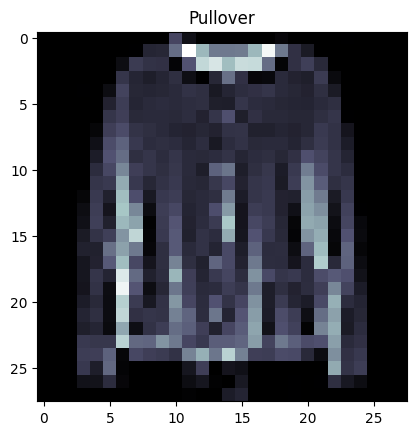

In [9]:
# See nth item
n=25
plt.figure()
plt.imshow(X_test[n], cmap=plt.cm.bone)
plt.title(class_label[n])

In [10]:
incorrect_predictions = [i for i, label in enumerate(class_label) if label != labels[y_test[i]]]
len(incorrect_predictions)

935

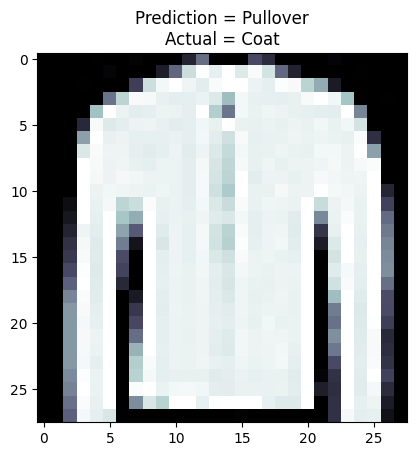

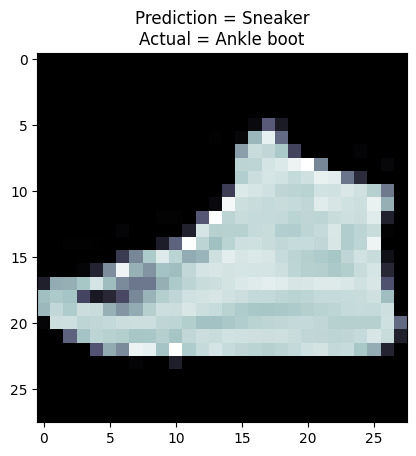

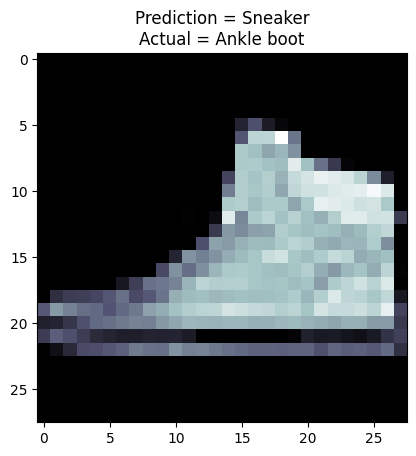

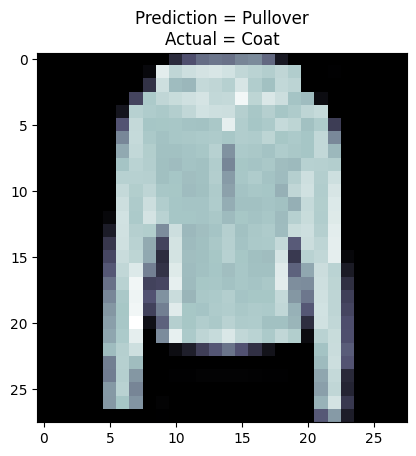

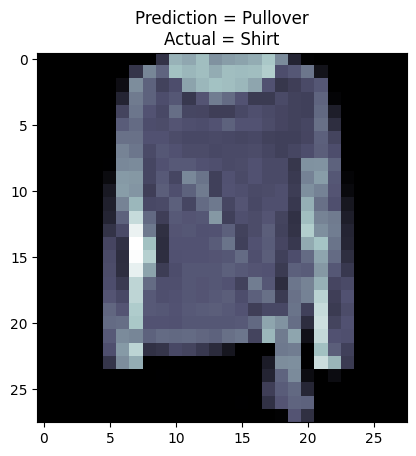

In [11]:
from random import sample

sample_incorrect = sample(incorrect_predictions, 5)

for sample in sample_incorrect:
    plt.figure()
    plt.imshow(X_test[sample], cmap=plt.cm.bone)
    plt.title(f'Prediction = {class_label[sample]}\nActual = {labels[y_test[sample]]}')